In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

from scipy.stats import maxwell


In [4]:
# Monte Carlo "disk-kick model"
"""
1. initialize host stars with kinematics like those of molecular clouds
2. simulate disk-heating for each one by generating Poisson-distributed
  events for each star in the population
3. at each event, draw from 3D Maxwell-Boltzmann distribution and apply
  the velocity kick to perturb the star
4. at a certain galactic time, look at the distribution of ISO velocities
    - how many particles have old ages and `Oumuamua-like kinematics
    - how many particles are young and have `Oumuamua-like kinematics
    - how do these results compare to kinematically-complete survey
"""

'\n1. initialize host stars with kinematics like those of molecular clouds\n2. simulate disk-heating for each one by generating Poisson-distributed\n  events for each star in the population\n3. at each event, draw from 3D Maxwell-Boltzmann distribution and apply\n  the velocity kick to perturb the star\n4. at a certain galactic time, look at the distribution of ISO velocities\n    - how many particles have old ages and `Oumuamua-like kinematics\n    - how many particles are young and have `Oumuamua-like kinematics\n    - how do these results compare to kinematically-complete survey\n'

In [30]:
Ncomet = 100
# draw velocities from standard normal distribution
initial_velocities = np.random.randn(Nstar, 3)

In [31]:
# assume same rate constant throughout time
event_rate = 1/125 # units are Myr^{-1} 
# ^the underlying rate of disk-heating events

# draw Poisson events for a 1 Myr interval
# array length is the number of comets
#  i.e. zeroth index is the number of events that 
#   comet 1 experienced in the simulated 1 Myr interval
event_counts = np.random.poisson(event_rate, size=Ncomet)

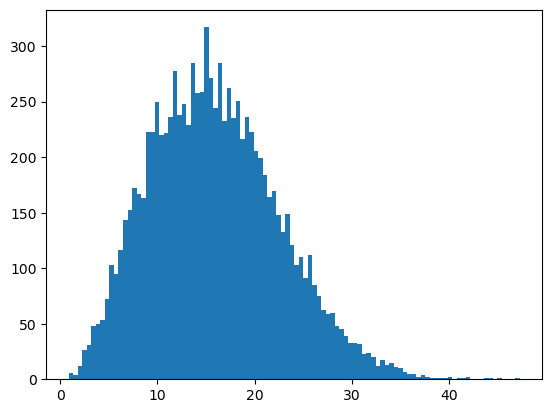

In [46]:
# scale factor is a = sqrt(kT/m) related to "thermal energy" of the stars
#np.median(maxwell.rvs(size=10000, scale = 10)) 
# ^should be 2 * scale / sqrt(2/pi)

# loc is an offset from zero for the minimum value

# plot a histogram to explore the Maxwell-Boltzmann distribution
#   and ensure that we know what the parameter do
fig, ax = plt.subplots()
ax.hist(maxwell.rvs(size=10000, scale = 10, loc = 0), bins = 100)
plt.show()

In [65]:
# set the number of Myr to run the simulation
tot_time = 250

# get a list of the number of disk-heating events that 
# the star experiences in each timestep
star_events = np.random.poisson(event_rate, size=tot_time)

# get a list of the number of disk-heating events that
#  the exo-comets experience in each timestep
comet_events = np.random.poisson(event_rate, size = (Ncomet, tot_time))

In [67]:
# TODO
# convert the Poisson events into disk-heating events
#   by applying a 3-D Maxwell-Boltzmann distribution
#   kick for each event

# at each timestep, check to see how many interstellar objects
#   are traceable to their host star (i.e. neither has experienced
#   a disk-heating event) and get the velocity dispersion

# we'll want to run many stars to get a statistical sample

In [ ]:
# here's an idea for the function that could be used to apply the velocity kicks
def apply_kicks(velocities, event_counts):
    for i, count in enumerate(event_counts):
        for _ in range(count):
            kick = maxwell.rvs(size=3, scale = 10)
            velocities[i] += kick
    return velocities

updated_v = apply_kicks(initial_v, event_counts)